In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hw-200/hw_200.csv


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# Ensure plots show inside notebook
%matplotlib inline

# Load dataset
df = pd.read_csv('/kaggle/input/hw-200/hw_200.csv',index_col = 0)
print(df.iloc[:4])

       Height(Inches)"  "Weight(Pounds)"
Index                                   
1                65.78            112.99
2                71.52            136.49
3                69.40            153.03
4                68.22            142.34


In [23]:
#Basic structure
df.info

<bound method DataFrame.info of        Height(Inches)"  "Weight(Pounds)"
Index                                   
1                65.78            112.99
2                71.52            136.49
3                69.40            153.03
4                68.22            142.34
5                67.79            144.30
...                ...               ...
196              65.80            120.84
197              66.11            115.78
198              68.24            128.30
199              68.02            127.47
200              71.39            127.88

[200 rows x 2 columns]>

In [24]:
#Summary statistics for numeric columns
df.describe()

,"Height(Inches)""","""Weight(Pounds)"""
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000


Rows: 200
Columns: 2
No obvious missing values
Approx. height mean (inches): 68
Approx. weight mean (pounds): 127

In [25]:
df.columns = df.columns.str.replace('"','')
df.columns = df.columns.str.strip()
df = df.rename(columns={'Height(Inches)': 'height','Weight(Pounds)':'weight'})
df.head()

,height,weight
Index,,
1,65.78,112.99
2,71.52,136.49
3,69.40,153.03
4,68.22,142.34
5,67.79,144.30


In [26]:
#Basic descriptive stats

h_mean = df.height.mean()
h_max = df.height.max()
h_min = df.height.min()
h_std = df.height.std()
w_mean = df.weight.mean()
w_max = df.weight.max()
w_min = df.weight.min()
w_std = df.weight.std()
print(f'''Data Frame basic descriptive stats:
height: mean= {round(h_mean,2)}, max= {round(h_max,2)}, min= {round(h_min,2)}, std= {round(h_std,2)}.
weight: mean= {round(w_mean,2)}, max= {round(w_max,2)}, min= {round(w_min,2)}, std= {round(w_std,2)}.
''')

Data Frame basic descriptive stats:
height: mean= 67.95, max= 73.9, min= 63.43, std= 1.94.
weight: mean= 127.22, max= 158.96, min= 97.9, std= 11.96.



In [27]:
#Find extremes

tallest = df.iloc[df.height.idxmax()]
shortest = df.iloc[df.height.idxmin()]
heaviest = df.iloc[df.weight.idxmax()]
lightest = df.iloc[df.weight.idxmin()]
print(f'''The tallest person's info is: {tallest}
The shortest person's info is: {shortest}
The heaviest person's info is: {shortest}
The lightest person's info is: {shortest}''')

The tallest person's info is: height     69.98
weight    130.40
Name: 140, dtype: float64
The shortest person's info is: height     66.77
weight    128.14
Name: 99, dtype: float64
The heaviest person's info is: height     66.77
weight    128.14
Name: 99, dtype: float64
The lightest person's info is: height     66.77
weight    128.14
Name: 99, dtype: float64


In [28]:
#Sortings
top_10_h= df.sort_values(by='height', ascending=False).iloc[:10]
print(f'''Ten tallest info: 
{top_10_h}''')

Ten tallest info: 
       height  weight
Index                
139     73.90  151.39
175     73.83  139.30
155     72.44  136.74
159     72.02  138.78
35      71.80  140.10
2       71.52  136.49
93      71.49  140.61
200     71.39  127.88
132     71.23  130.70
19      71.23  137.90


In [29]:
top_10_w= df.sort_values(by='weight', ascending=False).iloc[:10]
print(f'''Ten heaviest info: 
{top_10_w}''') 

Ten heaviest info: 
       height  weight
Index                
157     70.98  158.96
57      70.41  155.90
83      70.05  155.38
3       69.40  153.03
139     73.90  151.39
56      70.18  147.89
51      69.91  147.02
194     67.41  146.34
161     67.08  146.29
47      66.88  145.68


In [30]:
bottom_10_h = df.sort_values(by='height', ascending=True).iloc[:10]
print(f'''Ten shortest info: 
{bottom_10_h}''') 

Ten shortest info: 
       height  weight
Index                
98      63.43  123.10
23      63.48   97.90
110     63.84  127.19
40      64.05  106.71
156     64.13  106.11
74      64.29  102.84
162     64.39  109.88
134     64.40  123.79
148     64.50  112.89
101     64.87  102.09


In [31]:
bottom_10_w = df.sort_values(by='weight', ascending=True).iloc[:10]
print(f'''Ten lightest info: 
{bottom_10_w}''')

Ten lightest info: 
       height  weight
Index                
23      63.48   97.90
104     65.61   98.64
190     68.08  101.47
101     64.87  102.09
74      64.29  102.84
31      69.52  103.30
69      67.22  103.53
176     66.81  104.83
156     64.13  106.11
45      65.98  106.45


In [32]:
#Create a BMI column
bmi_col = pd.Series(round(df.weight / (df.height)**2 * 703, 2), name='BMI')
#Add column to Data Frame
df = df.join(bmi_col)
df.head()

,height,weight,BMI
Index,,,
1,65.78,112.99,18.36
2,71.52,136.49,18.76
3,69.40,153.03,22.34
4,68.22,142.34,21.50
5,67.79,144.30,22.07


In [33]:
#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

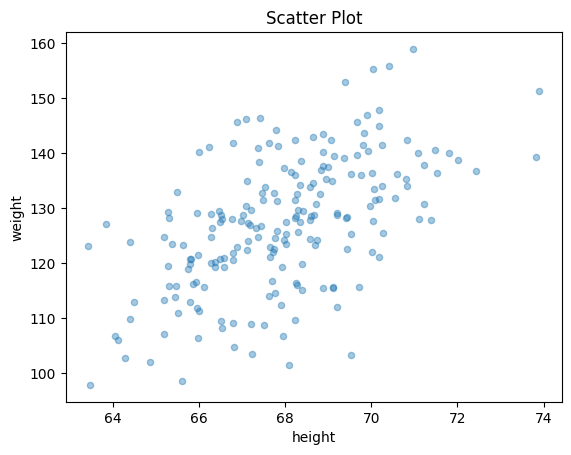

In [34]:
#Scatter plot of height vs weight
df.plot(kind='scatter', x= 'height', y= 'weight', alpha= 0.4)
plt.title('Scatter Plot')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

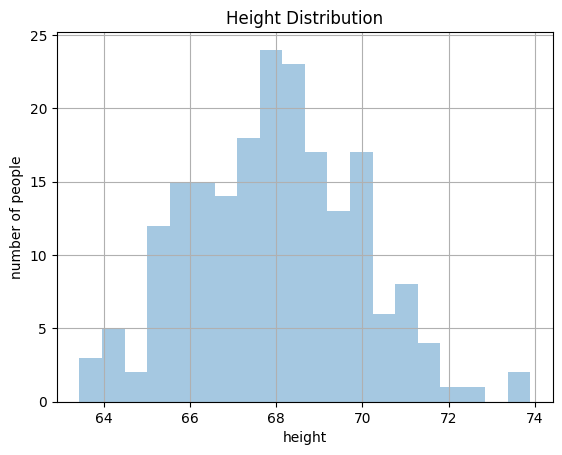

In [35]:
#Height histogram
df.height.hist(bins=20, alpha= 0.4)
plt.title('Height Distribution')
plt.xlabel('height')
plt.ylabel('number of people')
plt.show()

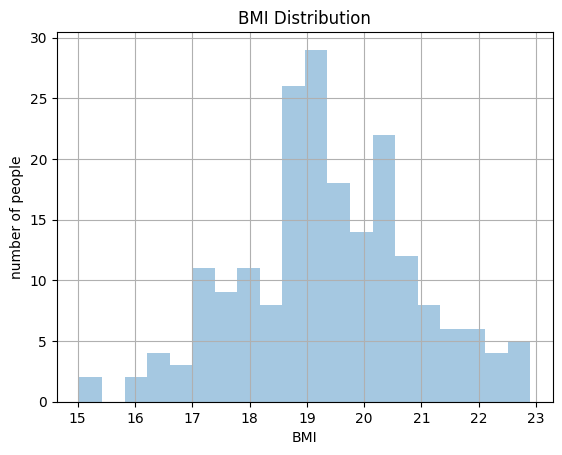

In [36]:
#BMI histogram
df.BMI.hist(bins=20, alpha= 0.4)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('number of people')
plt.show()

1. Height Distribution

Typical range: Around 66 to 70 inches (most frequent bin in the histogram).

Peaks: The histogram peaks around 67–68 inches, meaning most people fall in this height range.

Outliers: A few individuals below 64 inches and a few above 73 inches.

Shape: Roughly normal (bell-shaped), no major skew.

2. Weight Distribution

Typical range: Roughly 115–140 pounds, based on histogram density.

Outliers: A small number below 100 pounds and above 155 pounds.

Shape: Slight right skew (a few heavier values).

3. BMI Distribution

Typical BMI values: Mostly between 18 and 21 (healthy range).

Spread: Moderate — BMI varies but stays within a narrow band.

Outliers:

Low outlier around 15 (underweight).

Upper outlier around 23 (slightly overweight).

Shape: Normal-like with a peak around 19–20.

4. Scatter Plot Interpretation (Height vs Weight)

Clear positive correlation: taller individuals tend to weigh more.

Relationship is not very tight — height explains some, but not all, variation in weight.

No clusters indicating distinct groups (gender or age groups missing).

5. Interesting Observations

One main dense cluster between 66–69 inches and 120–140 pounds.

A smaller secondary cluster (less pronounced) around 70–72 inches, also near 140 pounds.

A few individuals under 100 pounds and over 155 pounds, confirming histogram outliers.

6. Limitations

Sample size: Only 200 individuals.

Synthetic data: Not from real measurements, so patterns may not generalize.

Missing context: No age, gender, or ethnicity — factors that influence height, weight, and BMI.

Uniform distribution by design: No natural demographic variation.